# Credit Card Fraud: Data Mining Final Project
### By: Brain Zschau

The dataset we will be using can be found here: [https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

You can either download it manually and put the csv file into the folder datasets or set your kaggle username and kaggle key below and the dataset will be downloaded and extracted for you.

In [43]:
import os
from pathlib import Path
import zipfile

# Set your Kaggle API credentials (replace 'your_username' and 'your_key' with your actual Kaggle username and key)
os.environ['KAGGLE_USERNAME'] = 'your_username'
os.environ['KAGGLE_KEY'] = 'your_key'

# Specify the dataset you want to download
dataset_name = 'mlg-ulb/creditcardfraud'

# Specify the destination directory
destination_dir = Path('.') / 'datasets'

# Create the destination directory if it does not exist
destination_dir.mkdir(parents=True, exist_ok=True)

# Check if the file exists; if not, download it
zip_file_path = destination_dir / f'{dataset_name.split("/")[1]}.zip'
if not zip_file_path.is_file():
    # Download the dataset
    os.system(f'kaggle datasets download -d {dataset_name} -p {destination_dir}')

    # Extract the contents of the zip file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(destination_dir)

# List the contents of the destination directory
print(f"Contents of {destination_dir}: {os.listdir(destination_dir)}")

Contents of datasets: ['creditcard.csv', 'creditcardfraud.zip']


# Part 1

## Data Processing

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset from CSV
file_path = 'datasets/creditcard.csv'  # Change this to the actual path of your CSV file
data = pd.read_csv(file_path)

# Assuming your dataset has a column named 'label' for the target variable (Y)
X = data.drop('Class', axis=1)  # Features
y = data['Class']  # Target variable

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Size of the test dataset:", len(X_test))

Size of the test dataset: 42722


## Decision Trees 

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Train a Decision Tree model
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train);

In [46]:
# Evaluate the model on the test set
y_pred_dt = model_dt.predict(X_test)

# Calculate overall accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Overall Accuracy: {accuracy_dt:.2%}')

# Measure prediction speed
start_time = time.time()
y_pred = model_dt.predict(X_test)
end_time = time.time()
prediction_time_dt = end_time - start_time
print(f'Prediction Speed: {prediction_time_dt:.4f} seconds')

# Calculate false negatives
conf_matrix_dt = confusion_matrix(y_test, y_pred)
false_negatives_dt = conf_matrix_dt[1, 0]
print(f'False Negatives: {false_negatives_dt}')

Overall Accuracy: 99.92%
Prediction Speed: 0.0055 seconds
False Negatives: 10


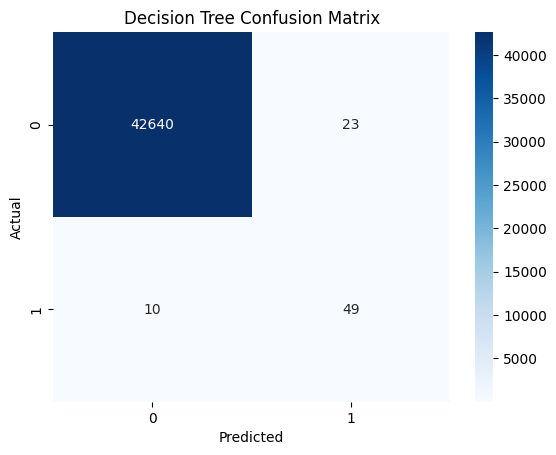

In [47]:
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

## Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Train a Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train);

In [49]:
# Evaluate the model on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Calculate overall accuracy
accuracy_lr = accuracy_score(y_test, y_pred_logistic)
print(f'Logistic Regression Overall Accuracy: {accuracy_lr:.2%}')

# Measure prediction speed
start_time = time.time()
y_pred_lr = logistic_model.predict(X_test)
end_time = time.time()
prediction_time_lr = end_time - start_time
print(f'Logistic Regression Prediction Speed: {prediction_time_lr:.4f} seconds')

# Calculate false negatives
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
false_negatives_lr = conf_matrix_lr[1, 0]
print(f'Logistic Regression False Negatives: {false_negatives_lr}')

Logistic Regression Overall Accuracy: 99.95%
Logistic Regression Prediction Speed: 0.0040 seconds
Logistic Regression False Negatives: 17


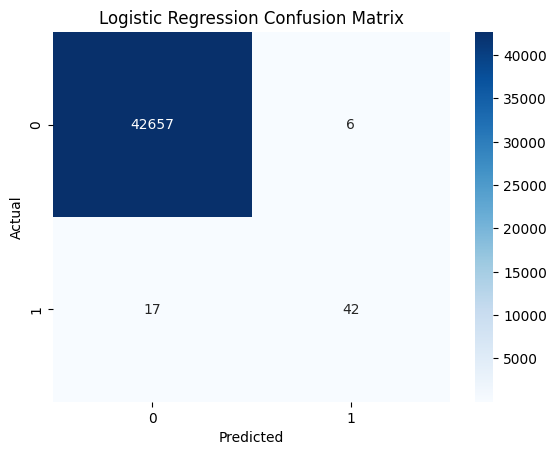

In [50]:
# Confusion Matrix
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

## Random Forests

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Train a Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train);

In [52]:
# Evaluate the model on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Calculate overall accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Overall Accuracy: {accuracy_rf:.2%}')

# Measure prediction speed
start_time = time.time()
y_pred_rf = random_forest_model.predict(X_test)
end_time = time.time()
prediction_time_rf = end_time - start_time
print(f'Random Forest Prediction Speed: {prediction_time_rf:.4f} seconds')

# Calculate false negatives
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
false_negatives_rf = conf_matrix_rf[1, 0]
print(f'Random Forest False Negatives: {false_negatives_rf}')

Random Forest Overall Accuracy: 99.97%
Random Forest Prediction Speed: 0.2252 seconds
Random Forest False Negatives: 9


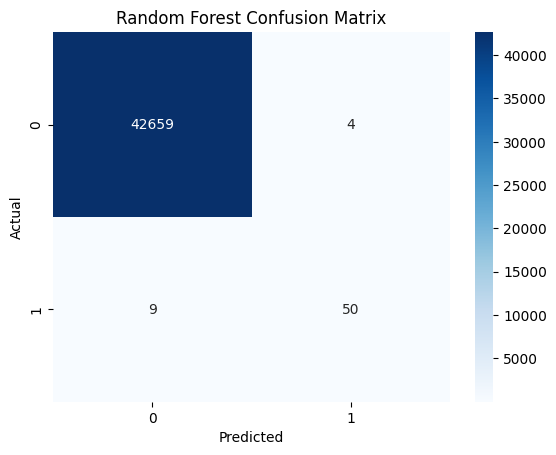

In [53]:
# Confusion Matrix
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

## Neural Networks

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt
import time


# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

# Build a simple Neural Network model
model_nn = Sequential()
model_nn.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model_nn.add(Dense(64, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))

# Compile the model
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_nn.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_val_scaled, y_val));

Epoch 1/10
6231/6231 [==============================] - 6s 917us/step - loss: 0.0059 - accuracy: 0.9992 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 2/10
6231/6231 [==============================] - 6s 907us/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 3/10
6231/6231 [==============================] - 6s 899us/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0034 - val_accuracy: 0.9991
Epoch 4/10
6231/6231 [==============================] - 6s 890us/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0039 - val_accuracy: 0.9994
Epoch 5/10
6231/6231 [==============================] - 6s 901us/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0038 - val_accuracy: 0.9993
Epoch 6/10
6231/6231 [==============================] - 6s 895us/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0039 - val_accuracy: 0.9991
Epoch 7/10
6231/6231 [==============================] - 6s 892us/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0034 -

In [55]:
# Evaluate the model on the test set
y_pred_nn = (model_nn.predict(X_test_scaled) > 0.5).astype(int)

# Calculate overall accuracy
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f'Neural Network Overall Accuracy: {accuracy_nn:.2%}')

# Measure prediction speed
start_time = time.time()
y_pred_nn = (model_nn.predict(X_test_scaled) > 0.5).astype(int)
end_time = time.time()
prediction_time_nn = end_time - start_time
print(f'Neural Network Prediction Speed: {prediction_time_nn:.4f} seconds')

# Calculate false negatives
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
false_negatives_nn = conf_matrix_nn[1, 0]
print(f'Neural Network False Negatives: {false_negatives_nn}')

1336/1336 [==============================] - 1s 584us/step
Neural Network Overall Accuracy: 99.96%
1336/1336 [==============================] - 1s 583us/step
Neural Network Prediction Speed: 1.1201 seconds
Neural Network False Negatives: 9


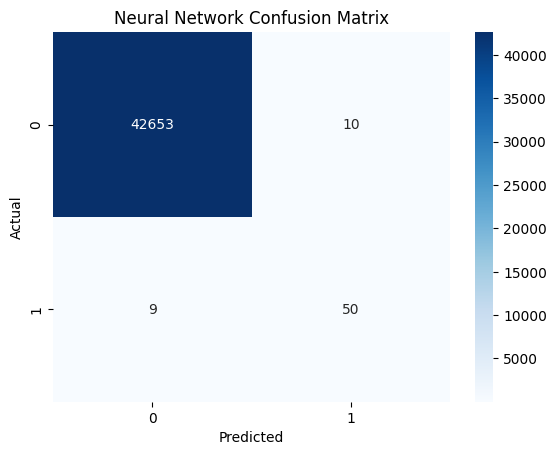

In [56]:
# Confustion Matrix
sns.heatmap(conf_matrix_nn, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Neural Network Confusion Matrix')
plt.show()

# Results

In [57]:
import pandas as pd


data = {
    'Model': ['Decision Tree', 'Logistic Regression', 'Random Forest', 'Neural Network'],
    'Accuracy': [accuracy_dt, accuracy_lr, accuracy_rf, accuracy_nn],
    'Prediction Time (seconds)': [prediction_time_dt, prediction_time_lr, prediction_time_rf, prediction_time_nn],
    'False Negatives': [false_negatives_dt, false_negatives_lr, false_negatives_rf, false_negatives_nn]
}

results_df = pd.DataFrame(data)

print(results_df)

# Export to CSV
results_df.to_csv('part1_model_results.csv', index=False)

                 Model  Accuracy  Prediction Time (seconds)  False Negatives
0        Decision Tree  0.999228                   0.005511               10
1  Logistic Regression  0.999462                   0.004001               17
2        Random Forest  0.999696                   0.225223                9
3       Neural Network  0.999555                   1.120136                9


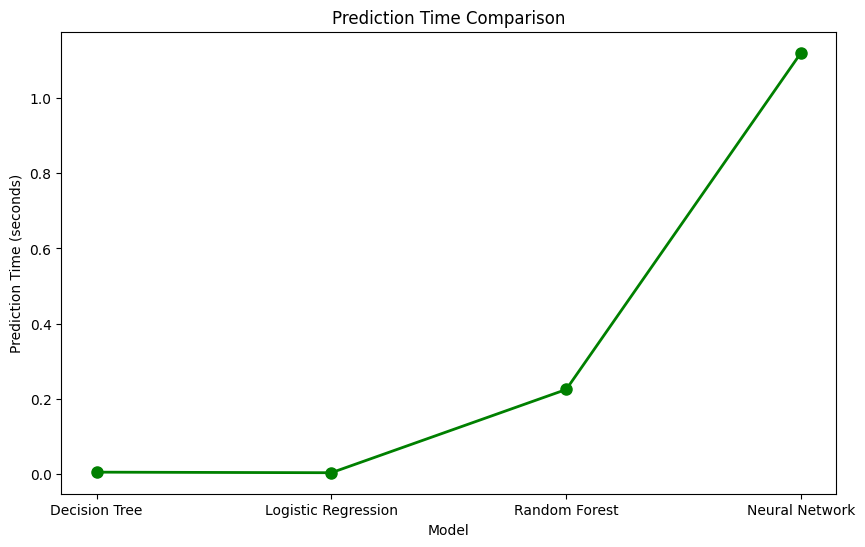

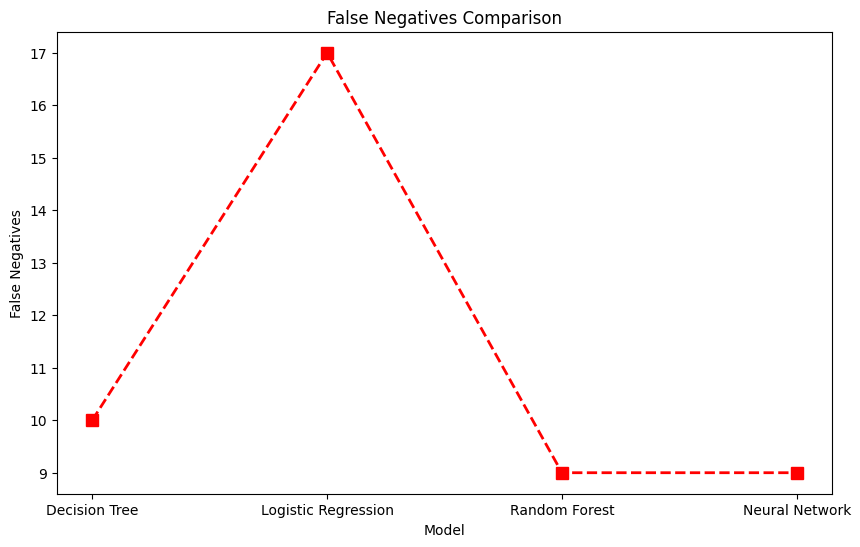

In [79]:
import matplotlib.pyplot as plt

# Assuming you have collected accuracy, prediction time, and false negatives for each model

models = ['Decision Tree', 'Logistic Regression', 'Random Forest', 'Neural Network']
accuracy = [accuracy_dt, accuracy_lr, accuracy_rf, accuracy_nn]
prediction_time = [prediction_time_dt, prediction_time_lr, prediction_time_rf, prediction_time_nn]
false_negatives = [false_negatives_dt, false_negatives_lr, false_negatives_rf, false_negatives_nn]

# Line chart for prediction time
plt.figure(figsize=(10, 6))
plt.plot(models, prediction_time, marker='o', color='green', linestyle='-', linewidth=2, markersize=8)
plt.title('Prediction Time Comparison')
plt.xlabel('Model')
plt.ylabel('Prediction Time (seconds)')
plt.show()

# Line chart for false negatives
plt.figure(figsize=(10, 6))
plt.plot(models, false_negatives, marker='s', color='red', linestyle='--', linewidth=2, markersize=8)
plt.title('False Negatives Comparison')
plt.xlabel('Model')
plt.ylabel('False Negatives')
plt.show()

# Part 2

## Data Processing

In [59]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Split the data into training, validation, and testing sets
# 70% training, 15% validation, 15% testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Undersample the majority class using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_us, y_train_us = rus.fit_resample(X_train, y_train)
X_val_us, y_val_us = rus.fit_resample(X_val, y_val)

print("Size of the test dataset:", len(X_test))

Size of the test dataset: 42722


## Decision Trees

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Create and train the model
dt_model_us = DecisionTreeClassifier(random_state=42)
dt_model_us.fit(X_train_us, y_train_us);

In [76]:
# Evaluate the model on the test set
y_pred_dt_us = dt_model_us.predict(X_test)

# Calculate overall accuracy
accuracy_dt_us = accuracy_score(y_test, y_pred_dt_us)
print(f'Overall Accuracy (undersampled): {accuracy_dt_us:.2%}')

# Measure prediction speed
start_time = time.time()
y_pred_dt_us = dt_model_us.predict(X_test)
end_time = time.time()
prediction_time_dt_us = end_time - start_time
print(f'Prediction Speed (undersampled): {prediction_time_dt_us:.4f} seconds')

# Calculate false negatives
conf_matrix_dt_us = confusion_matrix(y_test, y_pred_dt_us)
false_negatives_dt_us = conf_matrix_dt_us[1, 0]
print(f'False Negatives (undersampled): {false_negatives_dt_us}')

Overall Accuracy (undersampled): 91.16%
Prediction Speed (undersampled): 0.0081 seconds
False Negatives (undersampled): 2


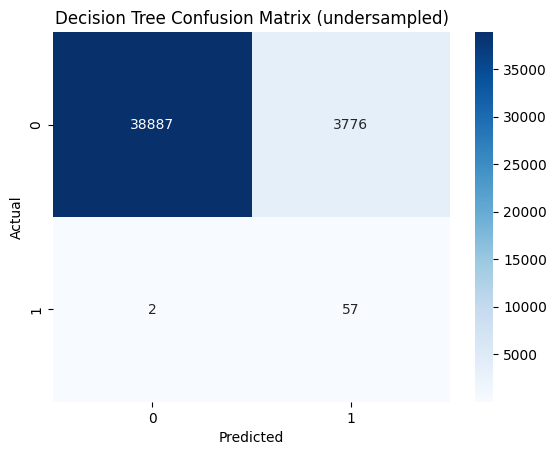

In [62]:
# Example for Decision Tree Confusion Matrix (undersampled)
sns.heatmap(conf_matrix_dt_us, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix (undersampled)')
plt.show()

## Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Train a Logistic Regression model
logistic_model_us = LogisticRegression(max_iter=1000, random_state=42)
logistic_model_us.fit(X_train_us, y_train_us);

In [78]:
# Evaluate the model on the test set
y_pred_logistic_us = logistic_model_us.predict(X_test)

# Calculate overall accuracy
accuracy_lr_us = accuracy_score(y_test, y_pred_logistic_us)
print(f'Logistic Regression Overall Accuracy (undersampled): {accuracy_lr_us:.2%}')

# Measure prediction speed
start_time = time.time()
y_pred_lr_us = logistic_model.predict(X_test)
end_time = time.time()
prediction_time_lr_us = end_time - start_time
print(f'Logistic Regression Prediction Speed (undersampled): {prediction_time_lr_us:.4f} seconds')

# Calculate false negatives
conf_matrix_lr_us = confusion_matrix(y_test, y_pred_lr_us)
false_negatives_lr_us = conf_matrix_lr_us[1, 0]
print(f'Logistic Regression False Negatives (undersampled): {false_negatives_lr_us}')

Logistic Regression Overall Accuracy (undersampled): 95.87%
Logistic Regression Prediction Speed (undersampled): 0.0033 seconds
Logistic Regression False Negatives (undersampled): 17


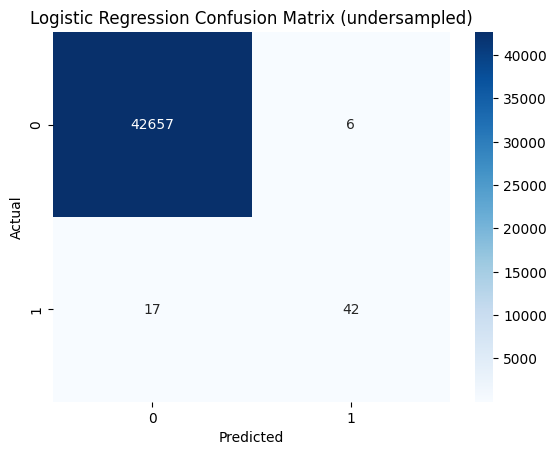

In [65]:
# Confusion Matrix
sns.heatmap(conf_matrix_lr_us, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix (undersampled)')
plt.show()

## Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Train a Random Forest model
random_forest_model_us = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model_us.fit(X_train_us, y_train_us);

In [67]:
# Evaluate the Model on the Test Set
y_pred_rf_us = random_forest_model_us.predict(X_test)

# Calculate Overall Accuracy
accuracy_rf_us = accuracy_score(y_test, y_pred_rf_us)
print(f'Random Forest Overall Accuracy (undersampled): {accuracy_rf_us:.2%}')

# Measure Prediction Speed
start_time = time.time()
y_pred_rf_us = random_forest_model_us.predict(X_test)
end_time = time.time()
prediction_time_rf_us = end_time - start_time
print(f'Random Forest Prediction Speed (undersampled): {prediction_time_rf_us:.4f} seconds')

# Calculate False Negatives
conf_matrix_rf_us = confusion_matrix(y_test, y_pred_rf_us)
false_negatives_rf_us = conf_matrix_rf_us[1, 0]
print(f'Random Forest False Negatives (undersampled): {false_negatives_rf_us}')

Random Forest Overall Accuracy (undersampled): 97.50%
Random Forest Prediction Speed (undersampled): 0.1842 seconds
Random Forest False Negatives (undersampled): 3


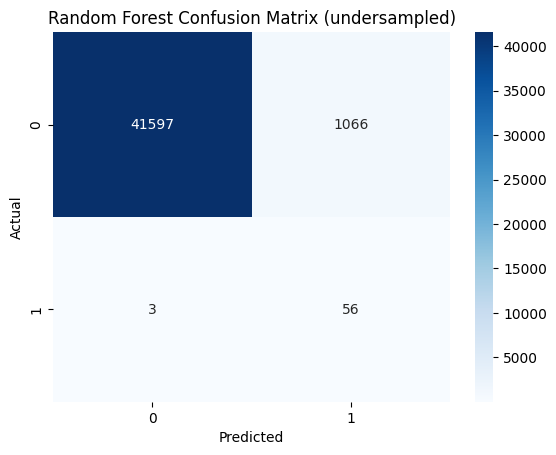

In [68]:
sns.heatmap(conf_matrix_rf_us, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix (undersampled)')
plt.show()

## Neural Network

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt
import time


# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val__us_scaled = scaler.transform(X_val_us)

# Build a simple Neural Network model
model_nn_us = Sequential()
model_nn_us.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model_nn_us.add(Dense(64, activation='relu'))
model_nn_us.add(Dense(1, activation='sigmoid'))

# Compile the model
model_nn_us.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_nn_us.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_val__us_scaled, y_val_us))

Epoch 1/10
6231/6231 [==============================] - 5s 788us/step - loss: 0.0060 - accuracy: 0.9991 - val_loss: 0.7657 - val_accuracy: 0.8831
Epoch 2/10
6231/6231 [==============================] - 5s 800us/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.7182 - val_accuracy: 0.8377
Epoch 3/10
6231/6231 [==============================] - 5s 772us/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.6576 - val_accuracy: 0.8896
Epoch 4/10
6231/6231 [==============================] - 5s 781us/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.7362 - val_accuracy: 0.8766
Epoch 5/10
6231/6231 [==============================] - 5s 785us/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.6157 - val_accuracy: 0.9091
Epoch 6/10
6231/6231 [==============================] - 5s 798us/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.5440 - val_accuracy: 0.8831
Epoch 7/10
6231/6231 [==============================] - 5s 788us/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.5523 -

In [70]:
# Evaluate the Model on the Test Set
y_pred_nn_us = (model_nn_us.predict(X_test_scaled) > 0.5).astype(int).flatten()

# Calculate Overall Accuracy
accuracy_nn_us = accuracy_score(y_test, y_pred_nn_us)
print(f'Neural Network Overall Accuracy (undersampled): {accuracy_nn_us:.2%}')

# Measure Prediction Speed
start_time = time.time()
y_pred_nn_us = (model_nn_us.predict(X_test_scaled) > 0.5).astype(int).flatten()
end_time = time.time()
prediction_time_nn_us = end_time - start_time
print(f'Neural Network Prediction Speed (undersampled): {prediction_time_nn_us:.4f} seconds')

# Calculate False Negatives
conf_matrix_nn_us = confusion_matrix(y_test, y_pred_nn_us)
false_negatives_nn_us = conf_matrix_nn_us[1, 0]
print(f'Neural Network False Negatives (undersampled): {false_negatives_nn_us}')

1336/1336 [==============================] - 1s 608us/step
Neural Network Overall Accuracy (undersampled): 99.95%
1336/1336 [==============================] - 1s 600us/step
Neural Network Prediction Speed (undersampled): 1.1566 seconds
Neural Network False Negatives (undersampled): 8


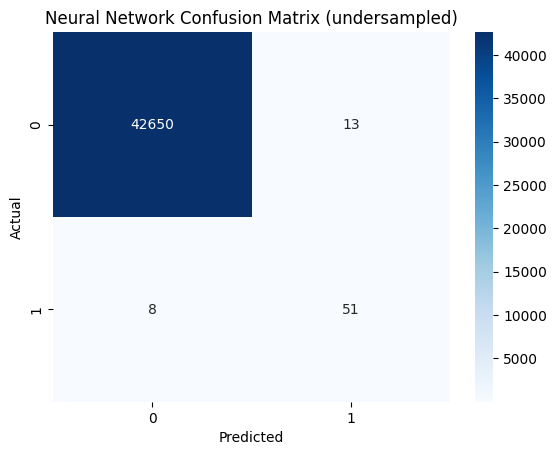

In [71]:
sns.heatmap(conf_matrix_nn_us, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Neural Network Confusion Matrix (undersampled)')
plt.show()

## Results

In [72]:
import pandas as pd

# Assuming you have already calculated the metrics for each model for both undersampled and original data
results_us = {
    'Model': ['Decision Tree', 'Logistic Regression', 'Random Forest', 'Neural Network'],
    'Accuracy': [accuracy_dt_us, accuracy_lr_us, accuracy_rf_us, accuracy_nn_us],
    'Prediction Time (seconds)': [prediction_time_dt_us, prediction_time_lr_us, prediction_time_rf_us, prediction_time_nn_us],
    'False Negatives': [false_negatives_dt_us, false_negatives_lr_us, false_negatives_rf_us, false_negatives_nn_us]
}

results_original = {
    'Model': ['Decision Tree', 'Logistic Regression', 'Random Forest', 'Neural Network'],
    'Accuracy': [accuracy_dt, accuracy_lr, accuracy_rf, accuracy_nn],
    'Prediction Time (seconds)': [prediction_time_dt, prediction_time_lr, prediction_time_rf, prediction_time_nn],
    'False Negatives': [false_negatives_dt, false_negatives_lr, false_negatives_rf, false_negatives_nn]
}

# Create DataFrames for both undersampled and original data
results_df_us = pd.DataFrame(results_us)
results_df_original = pd.DataFrame(results_original)

# Merge the DataFrames based on the 'Model' column
results_combined = pd.merge(results_df_original, results_df_us, on='Model', suffixes=('_original', '_undersampled'))

# Display the combined DataFrame
print(results_combined)

# Export to CSV
results_combined.to_csv('part2_model_results.csv', index=False)

                 Model  Accuracy_original  Prediction Time (seconds)_original  \
0        Decision Tree           0.999228                            0.005511   
1  Logistic Regression           0.999462                            0.004001   
2        Random Forest           0.999696                            0.225223   
3       Neural Network           0.999555                            1.120136   

   False Negatives_original  Accuracy_undersampled  \
0                        10               0.911568   
1                        17               0.958663   
2                         9               0.974978   
3                         9               0.999508   

   Prediction Time (seconds)_undersampled  False Negatives_undersampled  
0                                0.006015                             2  
1                                0.003711                            17  
2                                0.184160                             3  
3                          

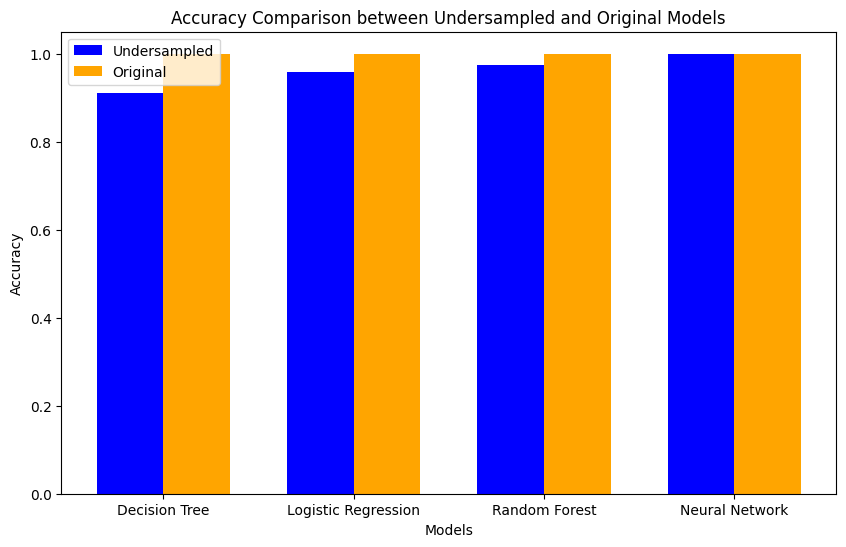

In [73]:
import matplotlib.pyplot as plt

# Assuming you have accuracy values for undersampled and original models
models = ['Decision Tree', 'Logistic Regression', 'Random Forest', 'Neural Network']
accuracy_us = [accuracy_dt_us, accuracy_lr_us, accuracy_rf_us, accuracy_nn_us]
accuracy_original = [accuracy_dt, accuracy_lr, accuracy_rf, accuracy_nn]

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(models))

plt.bar(index, accuracy_us, width=bar_width, label='Undersampled', color='blue')
plt.bar([i + bar_width for i in index], accuracy_original, width=bar_width, label='Original', color='orange')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison between Undersampled and Original Models')
plt.xticks([i + bar_width / 2 for i in index], models)
plt.legend()
plt.show()


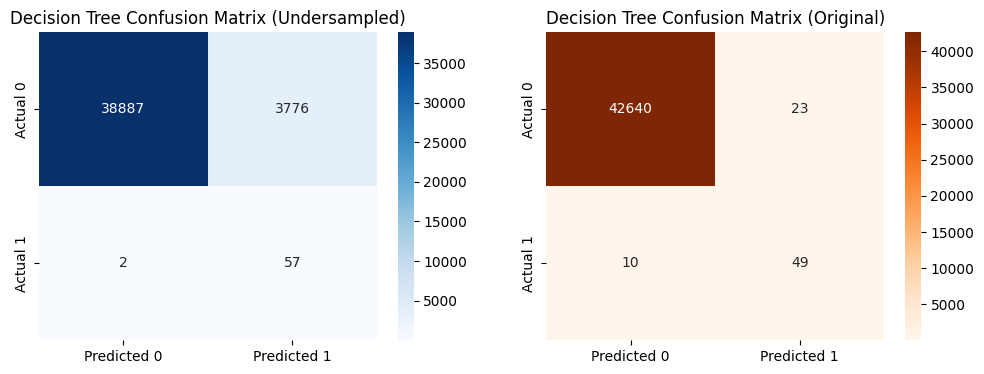

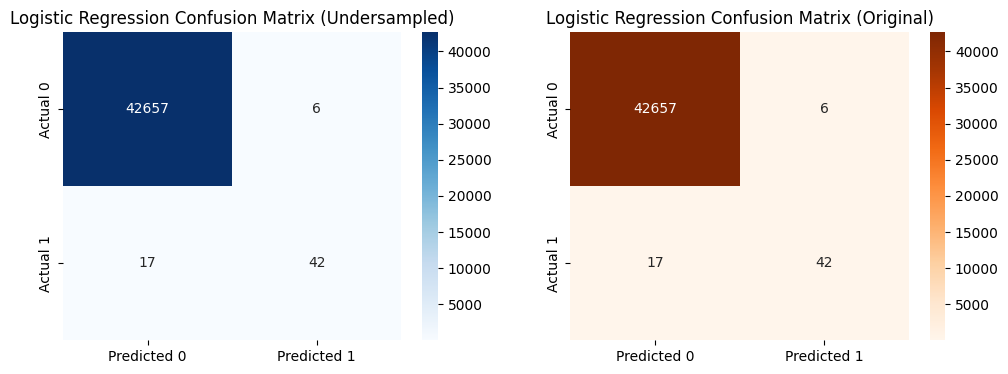

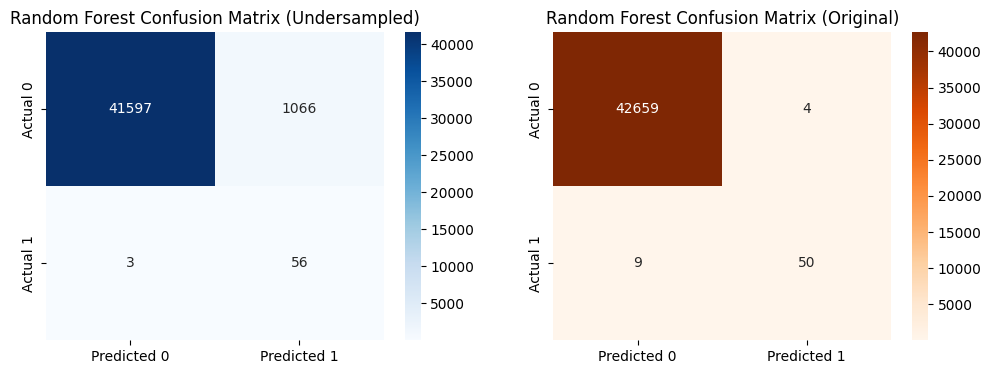

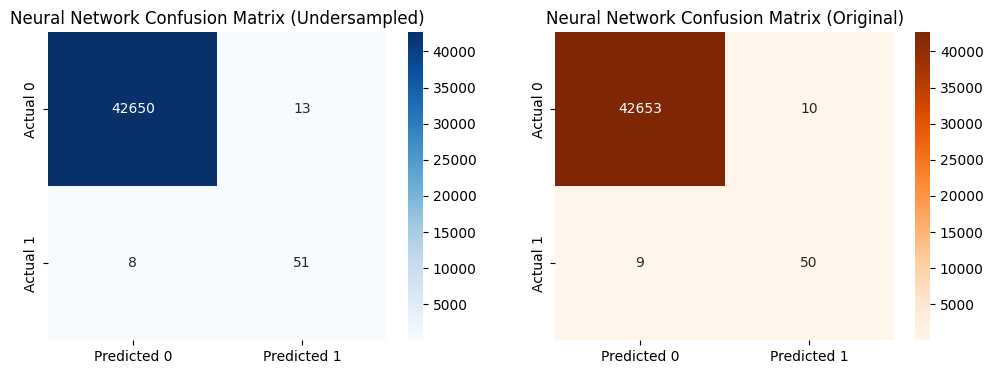

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_side_by_side_confusion_matrices(y_true, y_pred_us, y_pred_original, model_name):
    cm_us = confusion_matrix(y_true, y_pred_us)
    cm_original = confusion_matrix(y_true, y_pred_original)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.heatmap(cm_us, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'{model_name} Confusion Matrix (Undersampled)')

    plt.subplot(1, 2, 2)
    sns.heatmap(cm_original, annot=True, fmt="d", cmap="Oranges", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'{model_name} Confusion Matrix (Original)')

    plt.show()

plot_side_by_side_confusion_matrices(y_test, y_pred_dt_us, y_pred_dt, 'Decision Tree')
plot_side_by_side_confusion_matrices(y_test, y_pred_lr_us, y_pred_lr, 'Logistic Regression')
plot_side_by_side_confusion_matrices(y_test, y_pred_rf_us, y_pred_rf, 'Random Forest')
plot_side_by_side_confusion_matrices(y_test, y_pred_nn_us, y_pred_nn, 'Neural Network')


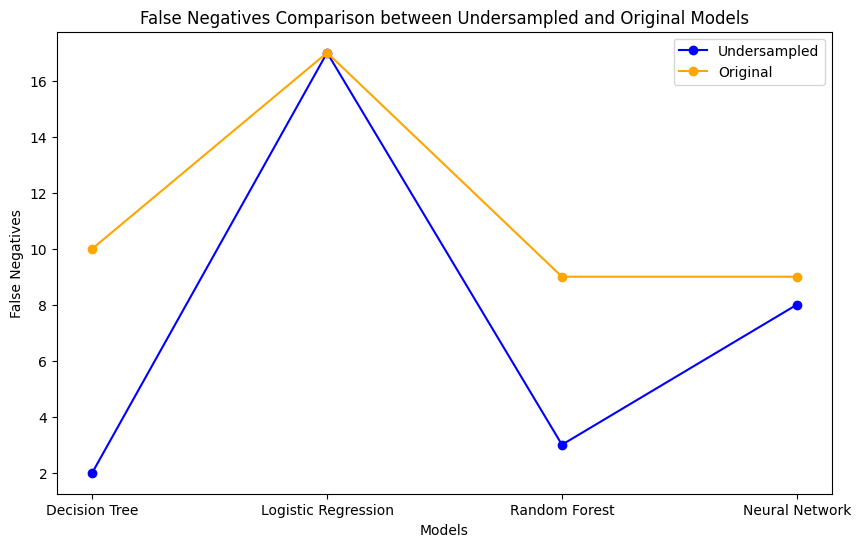

In [80]:
import matplotlib.pyplot as plt

# Assuming you have the number of false negatives for each model
models = ['Decision Tree', 'Logistic Regression', 'Random Forest', 'Neural Network']
false_negatives_us = [false_negatives_dt_us, false_negatives_lr_us, false_negatives_rf_us, false_negatives_nn_us]
false_negatives_original = [false_negatives_dt, false_negatives_lr, false_negatives_rf, false_negatives_nn]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(models, false_negatives_us, marker='o', label='Undersampled', color='blue')
plt.plot(models, false_negatives_original, marker='o', label='Original', color='orange')

plt.xlabel('Models')
plt.ylabel('False Negatives')
plt.title('False Negatives Comparison between Undersampled and Original Models')
plt.legend()
plt.show()
